In [1]:
import numpy as np

In [2]:
def AND(x1,x2):
#     w1 = 0.5
#     w2 = 0.5
    b = -0.6
#     hf = w1*x1+w2*x2+b
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    hf = np.sum(w*x)+b
    
    if hf <= 0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(AND(data[0],data[1])) #0,0,0,1

0
0
0
1


In [3]:
def NAND(x1,x2):
    b = 0.6
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    
    hf = np.sum(w*x)+b
    
    if hf <= 0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(NAND(data[0],data[1])) #1,1,1,0

1
1
1
0


In [4]:
def OR(x1,x2):
    b = -0.1
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    
    hf = np.sum(w*x)+b
    
    if hf <= 0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(OR(data[0],data[1])) #0,1,1,1

0
1
1
1


In [5]:
#AND,NAND,OR 함수를 적절하게 호출하여
#리턴된 값을 통해 XOR 결과를 출력하는 함수를 구현하시오
#OR, NAND 의 결과를 AND 출력 => 다층 퍼셉트론
def XOR(x1,x2):
    return AND(OR(x1,x2),NAND(x1,x2))

    #r1 = OR(x1,x2)
    #r2 = NAND(x1,x2)
    #y = AND(r1,r2)
    #return y
  
for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(XOR(data[0],data[1])) #0,1,1,0

0
1
1
0


In [6]:
#계단 함수
import matplotlib.pyplot as plt

def myStep(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-3,3,0.1)
y = myStep(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

<Figure size 640x480 with 1 Axes>

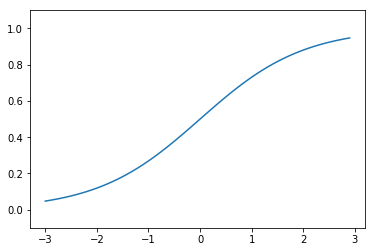

'\n선형함수: 출력이 입력값의 상수배만큼 변하는 함수 =>  f(x)=ax+b  => 1개의 직선 => 딥러닝X\n비선형함수: 1개의 직선으로는 그릴 수 없는 함수 => 딥러닝에서 사용\n'

In [7]:
#Sigmoid

def mySig(x):
    return 1/(1+np.exp(-x))

x = np.arange(-3,3,0.1)
y = mySig(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()
"""
선형함수: 출력이 입력값의 상수배만큼 변하는 함수 =>  f(x)=ax+b  => 1개의 직선 => 딥러닝X
비선형함수: 1개의 직선으로는 그릴 수 없는 함수 => 딥러닝에서 사용
"""

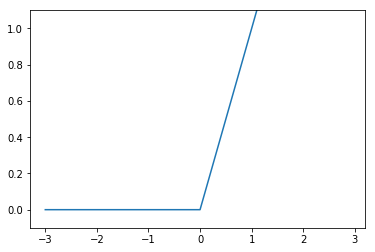

In [8]:
#relu

def myRelu(x):
    return np.maximum(0,x)

x = np.arange(-3,3,0.1)
y = myRelu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [9]:
##titanic 데이터 신경망으로 구성
#MLP 분류기 기반 타이타닉 데이터 분석

In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [12]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
full_df = pd.concat([train_df,test_df], ignore_index=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
train_df.info()
test_df.info()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [15]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [16]:
def extract_df():
    tr_df = full_df.loc[full_df['Survived'].notnull()]
    te_df = full_df.loc[full_df['Survived'].isnull()]
    return tr_df, te_df

train_df,test_df = extract_df()

In [17]:
title_sr = full_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
#호칭 추출: 공백문자+알파벳문자1개이상+ 점
full_df['Title'] = title_sr
pd.crosstab(full_df['Title'], full_df['Sex'])
title_sr.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Dona          1
Mme           1
Countess      1
Capt          1
Don           1
Lady          1
Name: Name, dtype: int64

In [18]:
#호칭 단순화
title_list = set(title_sr)
map_title_dic = {"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}
working_dic={}
for key in ['Lady','Countess','Capt','Col','Don','Major','Rev','Sir','Jonkheer','Dona']:
    working_dic[key] = 'Rare'

In [19]:
working_dic

{'Lady': 'Rare',
 'Countess': 'Rare',
 'Capt': 'Rare',
 'Col': 'Rare',
 'Don': 'Rare',
 'Major': 'Rare',
 'Rev': 'Rare',
 'Sir': 'Rare',
 'Jonkheer': 'Rare',
 'Dona': 'Rare'}

In [20]:
map_title_dic.update(working_dic)

In [21]:
map_title_dic #호칭을 매핑하기 위한 규칙 정의 딕셔너리
full_df['Title'] = full_df['Title'].replace(map_title_dic)

In [22]:
set(list(full_df['Title']))

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [23]:
SubCol1 = test_df.PassengerId
full_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [24]:
train_df,test_df=extract_df()

In [25]:
train_df
#Pclass별(1,2,3) 생존자 평균
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
feature_list = list(full_df)
for f in feature_list:
    print(f+" "+str(len(full_df[f].value_counts())))

Age 98
Embarked 3
Fare 281
Parch 8
Pclass 3
Sex 2
SibSp 7
Survived 2
Title 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6538D6548>,
      dtype=object)

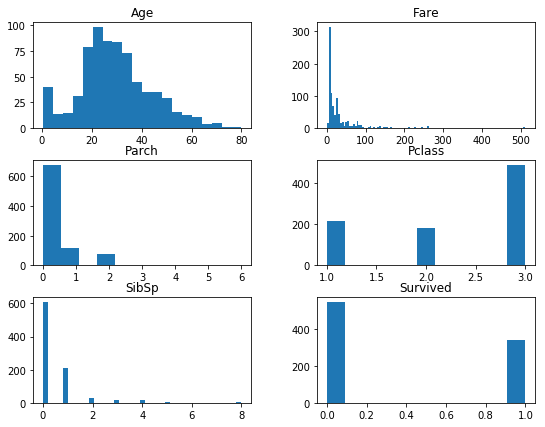

In [27]:
train_df.hist(figsize=(9,7), grid=False, bins='auto')

In [28]:
train_df.isnull().sum()
test_df.isnull().sum()
full_df['Embarked'].value_counts()
full_df['Embarked'].fillna("S", inplace=True)

In [29]:
full_df['Fare'].median()
full_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [30]:
train_df,test_df = extract_df()

In [31]:
full_df['Sex'] = full_df['Sex'].map({'female':0,'male':1})

In [32]:
def onehot(df,feature_list): #원핫 인코딩
    df = pd.get_dummies(df, columns=feature_list)
    return df
    
onehot_list = ['Title','Pclass','Embarked']
full_df = onehot(full_df,onehot_list)

In [33]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.5,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [34]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1046 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [35]:
train_df,test_df = extract_df()

In [36]:
x_train_age = full_df[[x for x in list(train_df) if not x in ['Survived']]]

In [37]:
x_predict_age = x_train_age.loc[x_train_age['Age'].isnull()]

In [38]:
x_train_age = x_train_age.loc[x_train_age['Age'].notnull()]

In [39]:
y_train_age = x_train_age.Age

In [40]:
x_train_age.drop(['Age'], axis=1, inplace=True)
x_predict_age.drop(['Age'], axis=1, inplace=True)

In [41]:
#MLP기반 나이 예측 및 나이 결측값 대체

In [42]:
from sklearn import preprocessing
scaler2 = preprocessing.StandardScaler().fit(x_train_age)
x_train_age = scaler2.transform(x_train_age)
x_predict_age = scaler2.transform(x_predict_age)

In [43]:
full_df[full_df['Age'].isnull()].index

Int64Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
            ...
            1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
           dtype='int64', length=263)

In [44]:
Age_None_list = full_df[full_df['Age'].isnull()].index.tolist()

In [45]:
from sklearn.neural_network import MLPRegressor
mlr = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))
mlr.fit(x_train_age, y_train_age)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [46]:
mlr.score(x_train_age,y_train_age)

0.6152924101458993

In [47]:
for a,b in zip(np.array(y_train_age),mlr.predict(x_train_age)):
    print(a," ",b)

22.0   26.767117864279715
38.0   42.15182554644101
26.0   23.961190319466386
35.0   33.483907174394176
35.0   28.380600937930886
54.0   36.56917219129116
2.0   3.6002314916740383
27.0   27.476017417295115
14.0   20.70577785152267
4.0   1.9128025626861394
58.0   34.041510705877855
20.0   28.380600937930886
39.0   39.24893984873219
14.0   23.995316315084786
55.0   35.80404924890149
2.0   6.101605548097734
31.0   31.042557757008698
35.0   34.62624888370409
34.0   32.20880398131077
15.0   23.05009960033782
28.0   45.498956544145884
8.0   5.9704310098273
38.0   38.782460099308636
19.0   17.11021487467659
40.0   47.203594585045934
66.0   31.095440350158103
28.0   39.621301046508016
42.0   36.16429577131612
21.0   28.380600937930886
18.0   19.299165033165032
14.0   14.48637892600048
40.0   33.66190274889124
27.0   30.092200139173997
3.0   2.6167543161577473
19.0   23.11280811562705
18.0   31.10400866590914
7.0   4.042648150841501
21.0   28.391893978793274
49.0   41.64332631987914
29.0   33.34

57.0   57.61010674620201
50.0   41.886779973230006
30.0   28.569309461498467
21.0   28.380600937930886
22.0   36.42925028037325
21.0   28.392083701879766
53.0   47.413181598936276
23.0   28.392083701879766
40.5   28.55700634213532
36.0   32.20880398131077
14.0   18.7567062610734
21.0   34.041510705877855
21.0   26.779948007201387
39.0   41.51233910801042
20.0   28.389445647534306
64.0   40.84355694337115
20.0   26.561939324980596
18.0   9.316873965049258
48.0   32.54465220195234
55.0   47.56765168747876
45.0   37.503717998255894
45.0   43.03712111713972
41.0   36.18249644474239
22.0   33.209947504740214
42.0   38.93223185914909
29.0   33.3450456423289
0.92   6.338565169034591
20.0   28.386247458362067
27.0   39.28255334667409
24.0   28.32300642953269
32.5   28.323457517461726
28.0   28.380600937930886
19.0   30.23371833109152
21.0   28.393023282879508
36.5   26.611890975245625
21.0   28.389445647534306
29.0   33.91370374368523
1.0   1.880119461735937
30.0   29.284750939439792
17.0   28

In [48]:
full_df['Age'][Age_None_list] = mlr.predict(x_predict_age).tolist()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.000000,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.000000,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.380601,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.000000,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.500000,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,28.380601,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [50]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [51]:
xtrain = full_df[full_df['Survived'].notnull()]

In [52]:
ytrain = full_df['Survived'][full_df['Survived'].notnull()]

In [53]:
xpredict = full_df['Survived'].isnull()

In [54]:
xtrain.drop(['Survived'], axis=1, inplace=True)
xpredict.drop(['Survived'], axis=1, inplace=True)

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [ ]:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain = scaler.transform(xtrain)
xpredict = scaler.transform(xpredict)

In [57]:
from sklearn.neural_network import MLPClassifier
MLPClassifier(solver='ibfgs', alpha=1e-5, hidden_layer_size=(50,50))

TypeError: __init__() got an unexpected keyword argument 'hidden_layer_size'

In [ ]:
clf.score(xtrain,ytrain)

In [ ]:
clf.predict(xtrain)

In [ ]:
subcol = clf.predict(xpredict).astype(int)

In [ ]:
SubCol1
sm = pd.DataFrame({'PassengerId':SubCol1, 'Survived':subcol})

In [ ]:
sm.to_csv('titanic_sub.csv', index=False)